# Chapter 6: Bytes & Text

In this chapter, we continue the study of the built-in data types. The next layer on top of numbers consists of **textual data** that are modeled primarily with the `str` type in Python. `str` objects are more complex than the numeric objects in [Chapter 5](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/05_numbers_00_lecture.ipynb) as they *consist* of an *arbitrary* and possibly large number of *individual* characters that may be chosen from *any* alphabet in the history of humankind. Luckily, Python abstracts away most of this complexity from us. However, after looking at the `str` type in great detail, we briefly introduce the `bytes` type at the end of this chapter, and learn how characters are modeled in memory.

## The `str` Type

To create a `str` object, we use the *literal* notation and type the text between enclosing **double quotes** `"`.

In [1]:
text = "Lorem ipsum dolor sit amet."

Like everything in Python, `text` is an object with an *identity*, a *type*, and a *value*.

In [2]:
id(text)

140461336295424

In [3]:
type(text)

str

As seen before, a `str` object evaluates to itself in a literal notation with enclosing **single quotes** `'`.

In [Chapter 1](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/01_elements_00_lecture.ipynb#Value-/-"Meaning"), we specify the double quotes `"` convention this book follows. Yet, single quotes `'` and double quotes `"` are *perfect* substitutes. We could use the reverse convention, as well. As [this discussion](https://stackoverflow.com/questions/56011/single-quotes-vs-double-quotes-in-python) shows, many programmers have *strong* opinions about such conventions. Consequently, the discussion was "closed as not constructive" by the moderators.

In [4]:
text

'Lorem ipsum dolor sit amet.'

As the single quote `'` is often used in the English language as a shortener, we could make an argument in favor of using the double quotes `"`: There are possibly fewer situations like the two code cells below, where we must **escape** the kind of quote used as the `str` object's delimiter with a backslash `"\"` inside the text (cf., also the "*Unicode & (Special) Characters*" section further below). However, double quotes `"` are often used as well, for example, to indicate a quote like the one by [Albert Einstein](https://de.wikipedia.org/wiki/Albert_Einstein) below. So, such arguments are not convincing.

Many proponents of the single quote `'` usage claim that double quotes `"` cause more **visual noise** on the screen. However, this argument is also not convincing as, for example, one could claim that *two* single quotes `''` look so similar to *one* double quote `"` that a reader may confuse an *empty* `str` object with a missing closing quote `"`. With the double quotes `"` convention we at least avoid such confusion (i.e., empty `str` objects are written as `""`).

This discussion is an excellent example of a [flame war](https://en.wikipedia.org/wiki/Flaming_%28Internet%29#Flame_war) in the programming world: Everyone has an opinion and the discussion leads to *no* result.

In [5]:
"Einstein said, \"If you can't explain it, you don't understand it.\""

'Einstein said, "If you can\'t explain it, you don\'t understand it."'

In [6]:
'Einstein said, "If you can\'t explain it, you don\'t understand it."'

'Einstein said, "If you can\'t explain it, you don\'t understand it."'

An *important* fact to know is that enclosing quotes of either kind are *not* part of the `str` object's *value*! They are merely *syntax* indicating the literal notation.

So, printing out the sentence with the built-in [print()](https://docs.python.org/3/library/functions.html#print) function does the same in both cases.

In [7]:
print("Einstein said, \"If you can't explain it, you don't understand it.\"")

Einstein said, "If you can't explain it, you don't understand it."


In [8]:
print('Einstein said, "If you can\'t explain it, you don\'t understand it."')

Einstein said, "If you can't explain it, you don't understand it."


As an alternative to the literal notation, we may use the built-in [str()](https://docs.python.org/3/library/stdtypes.html#str) constructor to cast non-`str` objects as `str` ones. As Chapter 10 reveals, basically any object in Python has a **text representation**. Because of that we may also pass `list` objects, the boolean `True` and `False`, or `None` to [str()](https://docs.python.org/3/library/stdtypes.html#str).

In [9]:
str(42)

'42'

In [10]:
str(42.87)

'42.87'

In [11]:
str([1, 2, 3])

'[1, 2, 3]'

In [12]:
str(True)

'True'

In [13]:
str(False)

'False'

In [14]:
str(None)

'None'

#### User Input

As shown in the "*Guessing a Coin Toss*" example in [Chapter 4](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/04_iteration_00_lecture.ipynb#Example:-Guessing-a-Coin-Toss), the built-in [input()](https://docs.python.org/3/library/functions.html#input) function displays a prompt to the user and returns whatever is entered as a `str` object. [input()](https://docs.python.org/3/library/functions.html#input) is in particular valuable when writing command-line tools.

In [15]:
user_input = input("Whatever you enter is put in a new string: ")

Whatever you enter is put in a new string:  I will be a string


In [16]:
type(user_input)

str

In [17]:
user_input

'I will be a string'

#### Reading Files

A more common situation where we obtain `str` objects is when reading the contents of a file with the [open()](https://docs.python.org/3/library/functions.html#open) built-in. In its simplest usage form, to open a [text file](https://en.wikipedia.org/wiki/Text_file) file, we pass in its path (i.e., "filename") as a `str` object.

In [18]:
file = open("lorem_ipsum.txt")

[open()](https://docs.python.org/3/library/functions.html#open) returns a **[proxy](https://en.wikipedia.org/wiki/Proxy_pattern)** object of type `TextIOWrapper` that allows us to interact with the file on disk. `mode='r'` shows that we opened the file in read-only mode and `encoding='UTF-8'` is explained in detail in the "*The `bytes` Type*" section at the end of this chapter.

In [19]:
type(file)

_io.TextIOWrapper

In [20]:
file

<_io.TextIOWrapper name='lorem_ipsum.txt' mode='r' encoding='UTF-8'>

`TextIOWrapper` objects come with plenty of type-specific methods and attributes.

In [21]:
file.readable()

True

In [22]:
file.writable()

False

In [23]:
file.name

'lorem_ipsum.txt'

In [24]:
file.encoding

'UTF-8'

So far, we have not yet read anything from the file (i.e., from disk)! That is intentional as, for example, the file could contain more data than could fit into our computer's memory. Therefore, we have to explicitly instruct the `file` object to read some of or all the data in the file.

One way to do that, is to simply loop over the `file` object with the `for` statement as shown next: In each iteration, `line` is assigned the next line in the file. Because we may loop over `TextIOWrapper` objects, they are *iterables*.

In [25]:
for line in file:
    print(line)

Lorem Ipsum is simply dummy text of the printing and typesetting industry.

Lorem Ipsum has been the industry's standard dummy text ever since the 1500s

when an unknown printer took a galley of type and scrambled it to make a type

specimen book. It has survived not only five centuries but also the leap into

electronic typesetting, remaining essentially unchanged. It was popularised in

the 1960s with the release of Letraset sheets.



Once we looped over the `file` object, it is **exhausted**: We can *not* loop over it a second time. So, the built-in [print()](https://docs.python.org/3/library/functions.html#print) function is *never* called in the code cell below!

In [26]:
for line in file:
    print(line)

After the `for`-loop, the `line` variable is still set and references the *last* line in the file. We verify that it is indeed a `str` object.

In [27]:
line

'the 1960s with the release of Letraset sheets.\n'

In [28]:
type(line)

str

An *important* observation is that the `file` object is still associated with an *open* **[file descriptor](https://en.wikipedia.org/wiki/File_descriptor)**. Without going into any technical details, we note that an operating system can only handle a *limited* number of "open files" at the same time, and, therefore, we should always *close* the file once we are done processing it.

`TextIOWrapper` objects have a `closed` attribute on them that indicates if the associated file descriptor is still open or has been closed. We can "manually" close any `TextIOWrapper` object with the [close()](https://docs.python.org/3/library/io.html#io.IOBase.close) method.

In [29]:
file.closed

False

In [30]:
file.close()

In [31]:
file.closed

True

The more Pythonic way is to use [open()](https://docs.python.org/3/library/functions.html#open) within the compound `with` statement (cf., [reference](https://docs.python.org/3/reference/compound_stmts.html#the-with-statement)): In the example below, the indented code block is said to be executed within the **context** of the `file` object that now plays the role of a **[context manager](https://docs.python.org/3/reference/datamodel.html#with-statement-context-managers)**. Many different kinds of context managers exist in Python with different applications and purposes. Context managers returned from [open()](https://docs.python.org/3/library/functions.html#open) mainly ensure that file descriptors get automatically closed after the last line in the code block is executed.

In [32]:
with open("lorem_ipsum.txt") as file:
    for line in file:
        print(line)

Lorem Ipsum is simply dummy text of the printing and typesetting industry.

Lorem Ipsum has been the industry's standard dummy text ever since the 1500s

when an unknown printer took a galley of type and scrambled it to make a type

specimen book. It has survived not only five centuries but also the leap into

electronic typesetting, remaining essentially unchanged. It was popularised in

the 1960s with the release of Letraset sheets.



In [33]:
file.closed

True

Using syntax familiar from [Chapter 3](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/03_conditionals_00_lecture.ipynb#The-try-Statement) to explain what the `with open(...) as file:` does above, we provide an alternative formulation with a `try` statement below: The `finally`-branch is *always* executed, even if an exception is raised inside the `for`-loop. Therefore, `file` is sure to be closed too. However, this formulation is somewhat less expressive.

In [34]:
try:
    file = open("lorem_ipsum.txt")
    for line in file:
        print(line)
finally:
    file.close()

Lorem Ipsum is simply dummy text of the printing and typesetting industry.

Lorem Ipsum has been the industry's standard dummy text ever since the 1500s

when an unknown printer took a galley of type and scrambled it to make a type

specimen book. It has survived not only five centuries but also the leap into

electronic typesetting, remaining essentially unchanged. It was popularised in

the 1960s with the release of Letraset sheets.



In [35]:
file.closed

True

As an alternative to reading the contents of a file by looping over a `TextIOWrapper` object, we may also call one of the methods they come with.

For example, the [read()](https://docs.python.org/3/library/io.html#io.TextIOBase.read) method takes a single `size` argument of type `int` and returns a `str` object with the specified number of characters.

In [36]:
file = open("lorem_ipsum.txt")

In [37]:
file.read(11)

'Lorem Ipsum'

When we call [read()](https://docs.python.org/3/library/io.html#io.TextIOBase.read) again, the returned `str` object begins where the previous one left off. This is because `TextIOWrapper` objects like `file` simply store a position at which the associated file on disk is being read. In other words, `file` is like a **cursor** pointing into a file.

In [38]:
file.read(11)

' is simply '

On the contrary, the [readline()](https://docs.python.org/3/library/io.html#io.TextIOBase.readline) method keeps reading until it hits a **newline character**. These are shown in `str` objects as `"\n"`.

In [39]:
file.readline()

'dummy text of the printing and typesetting industry.\n'

When we call [readline()](https://docs.python.org/3/library/io.html#io.TextIOBase.readline) again, we obtain the next line.

In [40]:
file.readline()

"Lorem Ipsum has been the industry's standard dummy text ever since the 1500s\n"

Lastly, the [readlines()](https://docs.python.org/3/library/io.html#io.IOBase.readlines) method returns a `list` object that holds *all* lines in the `file` from the current position to the end of the file. The latter position is often abbreviated as **EOF** in the documentation. Let's always remember that [readlines()](https://docs.python.org/3/library/io.html#io.IOBase.readlines) has the potential to crash a computer with a `MemoryError`.

In [41]:
file.readlines()

['when an unknown printer took a galley of type and scrambled it to make a type\n',
 'specimen book. It has survived not only five centuries but also the leap into\n',
 'electronic typesetting, remaining essentially unchanged. It was popularised in\n',
 'the 1960s with the release of Letraset sheets.\n']

Calling [readlines()](https://docs.python.org/3/library/io.html#io.IOBase.readlines) a second time, is as pointless as looping over `file` a second time.

In [42]:
file.readlines()

[]

In [43]:
file.close()

Because every `str` object created by reading the contents of a file in any of the ways shown in this section ends with a `"\n"`, we see empty lines printed between each `line` in the `for`-loops above. To print the entire text without empty lines in between, we pass a `end=""` argument to the [print()](https://docs.python.org/3/library/functions.html#print) function.

In [44]:
with open("lorem_ipsum.txt") as file:
    for line in file:
        print(line, end="")

Lorem Ipsum is simply dummy text of the printing and typesetting industry.
Lorem Ipsum has been the industry's standard dummy text ever since the 1500s
when an unknown printer took a galley of type and scrambled it to make a type
specimen book. It has survived not only five centuries but also the leap into
electronic typesetting, remaining essentially unchanged. It was popularised in
the 1960s with the release of Letraset sheets.


### A String of Characters

A **sequence** is yet another *abstract* concept (cf., the "*Containers vs. Iterables*" section in [Chapter 4](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/04_iteration_00_lecture.ipynb#Containers-vs.-Iterables)).

It unifies *four* [orthogonal](https://en.wikipedia.org/wiki/Orthogonality) (i.e., "independent") concepts into one bigger idea: Any data type, such as `str`, is considered a sequence if it

1. **contains**
2. a **finite** number of other "things" that
3. can be **iterated** over
4. in a *predictable* **order**.

[Chapter 7](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/07_sequences_00_lecture.ipynb#Collections-vs.-Sequences) formalizes these concepts in great detail. Here, we keep our focus on the `str` type that historically received its name as it models a **[string of characters](https://en.wikipedia.org/wiki/String_%28computer_science%29)**, and *string* is simply another term for *sequence* in the computer science literature.

Another example of a sequence is the `list` type. Because of that, `str` objects may be treated like `list` objects in many situations.

Below, the built-in [len()](https://docs.python.org/3/library/functions.html#len) function tells us how many characters make up `text`. [len()](https://docs.python.org/3/library/functions.html#len) would not work with an "infinite" object. As anything modeled in a program must fit into a computer's finite memory, there cannot exist truly infinite objects; however, [Chapter 7](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/07_sequences_00_lecture.ipynb#Iterators-vs.-Iterables) introduces specialized iterable data types that can be used to model an *infinite* series of "things" and that, consequently, have no concept of "length."

In [45]:
text

'Lorem ipsum dolor sit amet.'

In [46]:
len(text)

27

Being iterable, we may loop over `text` and do something with the individual characters, for example, print them out with extra space in between them. If it were not for the appropriately chosen name of the `text` variable, we could not tell what *concrete* type of object the `for` statement is looping over.

In [47]:
for character in text:
    print(character, end="  ")

L  o  r  e  m     i  p  s  u  m     d  o  l  o  r     s  i  t     a  m  e  t  .  

With the [reversed()](https://docs.python.org/3/library/functions.html#reversed) built-in, we may loop over `text` in reversed order. Reversing `text` only works as it has a forward order to begin with.

In [48]:
for character in reversed(text):
    print(character, end="  ")

.  t  e  m  a     t  i  s     r  o  l  o  d     m  u  s  p  i     m  e  r  o  L  

Being a container, we may check if a given `str` object is contained in `text` with the `in` operator.

The `in` operator has *two* distinct usages: First, it checks if a *single* character is contained in a `str` object. Second, it may also check if a shorter `str` object, then called a **substring**, is contained in a longer one.

In [49]:
"L" in text

True

In [50]:
"ipsum" in text

True

In [51]:
"veni, vidi, vici" in text

False

### Indexing

As `str` objects are *ordered* and *finite*, we may **index** into them to obtain individual characters with the **indexing operator** `[]`. This is analogous to how we obtained individual elements of a `list` object in [Chapter 1](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/01_elements_00_lecture.ipynb#Who-am-I?-And-how-many?).

In [52]:
text[0]

'L'

In [53]:
text[1]

'o'

The index must be of type `int`; othewise, we get a `TypeError`.

In [54]:
text[1.0]

TypeError: string indices must be integers

The last index is one less than the above "length" of the `str` object as we start counting at `0`.

In [55]:
text[26]  # == text[len(text) - 1]

'.'

An `IndexError` is raised whenever the index is out of range.

In [56]:
text[27]  # == text[len(text)]

IndexError: string index out of range

We may use *negative* indexes to start counting from the end of the `str` object, as shown in the figure below. Note how this only works because sequences are *finite*.

|   Index   | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10| 11| 12| 13| 14| 15| 16| 17| 18| 19| 20| 21| 22| 23| 24| 25| 26|
|:---------:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|**Reverse**|-27|-26|-25|-24|-23|-22|-21|-20|-19|-18|-17|-16|-15|-14|-13|-12|-11|-10|-9 |-8 |-7 |-6 |-5 |-4 |-3 |-2 |-1 |
| **Character**  |`L`|`o`|`r`|`e`|`m`|` `|`i`|`p`|`s`|`u`|`m`|` `|`d`|`o`|`l`|`o`|`r`|` `|`s`|`i`|`t`|` `|`a`|`m`|`e`|`t`|`.`|

In [57]:
text[-1]

'.'

In [58]:
text[-27]  # == text[-len(text)]

'L'

One reason why programmers like to start counting at `0` is that a positive index and its *corresponding* negative index always add up to the length of the sequence. Here, `6` and `21` add to `27`.

In [59]:
text[6]

'i'

In [60]:
text[-21]

'i'

### Slicing

A **slice** is a substring of a `str` object.

The **slicing operator** is a generalization of the indexing operator: We put one, two, or three integers within the brackets `[]`, separated by colons `:`. The three integers are then referred to as the *start*, *stop*, and *step* values.

Let's start with two integers, *start* and *stop*. Whereas the character at the *start* position is included in the returned `str` object, the one at the *stop* position is not. If both *start* and *stop* are positive, the difference "*stop* minus *start*" tells us how many characters the resulting slice has. So, below, `5 - 0 == 5` implies that `"Lorem"` consists of `5` characters. So, colloquially speaking, `text[0:5]` means "taking the first `5 - 0 == 5` characters of `text`."

In [61]:
text[0:5]

'Lorem'

In [62]:
text[12:len(text)]

'dolor sit amet.'

If left out, *start* defaults to `0` and *stop* to the length of the `str` object (i.e., the end).

In [63]:
text[:5]

'Lorem'

In [64]:
text[12:]

'dolor sit amet.'

Not including the character at the *stop* position makes working with individual slices easier as they add up to the original `str` object again (cf., the "*String Operations*" section below regarding the overloaded `+` operator).

In [65]:
text[:5] + text[5:]

'Lorem ipsum dolor sit amet.'

Slicing and indexing makes it easy to obtain shorter versions of the original `str` object. A common application would be to **parse** out meaningful substrings from raw text data.

In [66]:
text[:11] + text[-10:]

'Lorem ipsum sit amet.'

By combining a positive *start* with a negative *stop* index, we specify both ends of the slice *relative* to the ends of the entire `str` object. So, colloquially speaking, `6:-10` below means "drop the first six and last ten characters." The length of the resulting slice can then *not* be calculated from the indexes and depends only on the length of the original `str` object!

In [67]:
text[6:-10]

'ipsum dolor'

For convenience, the indexes do not need to lie within the range from `0` to `len(text)` when slicing. So, no `IndexError` is raised here.

In [68]:
text[-999:999]

'Lorem ipsum dolor sit amet.'

By leaving out both *start* and *stop*, we take a "full" slice that is essentially a *copy* of the original `str` object.

In [69]:
text[:]

'Lorem ipsum dolor sit amet.'

A *step* value of `i` can be used to obtain only every `i`th character.

In [70]:
text[::2]

'Lrmismdlrstae.'

A negative *step* size reverses the order of the characters.

In [71]:
text[::-1]

'.tema tis rolod muspi meroL'

### Immutability

Whereas elements of a `list` object *may* be *re-assigned*, as shortly hinted at in [Chapter 1](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/01_elements_00_lecture.ipynb#Who-am-I?-And-how-many?), this is *not* allowed for the individual characters of `str` objects. Once created, they can *not* be changed. Formally, we say that `str` objects are **immutable**. In that regard, they are like the numeric types in [Chapter 5](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/05_numbers_00_lecture.ipynb).

On the contrary, objects that may be changed after creation, are called **mutable**. We already saw in [Chapter 1](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/01_elements_00_lecture.ipynb#Who-am-I?-And-how-many?) how mutable objects are more difficult to reason about for a beginner, in particular, if more than one variable references it. Yet, mutability does have its place in a programmer's toolbox, and we revisit this idea in the next chapters.

The `TypeError` indicates that `str` objects are *immutable*: Assignment to an index or a slice are *not* supported.

In [72]:
text[0] = "X"

TypeError: 'str' object does not support item assignment

In [73]:
text[:5] = "random"

TypeError: 'str' object does not support item assignment

### String Methods

Objects of type `str` come with many **methods** bound on them (cf., the [documentation](https://docs.python.org/3/library/stdtypes.html#string-methods) for a full list). As seen before, they work like *normal* functions and are accessed via the **dot operator** `.`. Calling a method is also referred to as **method invocation**.

The [find()](https://docs.python.org/3/library/stdtypes.html#str.find) method returns the index of the first occurrence of a character or a substring. If no match is found, it returns `-1`. A mirrored version searching from the right called [rfind()](https://docs.python.org/3/library/stdtypes.html#str.rfind) exists as well. The [index()](https://docs.python.org/3/library/stdtypes.html#str.index) and [rindex()](https://docs.python.org/3/library/stdtypes.html#str.rindex) methods work in the same way but raise a `ValueError` if no match is found. So, we can control if a search fails *silently* or *loudly*.

In [74]:
text

'Lorem ipsum dolor sit amet.'

In [75]:
text.find("a")

22

In [76]:
text.find("b")

-1

In [77]:
text.find("dolor")

12

[find()](https://docs.python.org/3/library/stdtypes.html#str.find) takes optional *start* and *end* arguments that allow us to find occurrences other than the first one.

In [78]:
text.find("o")

1

In [79]:
text.find("o", 2)

13

In [80]:
text.find("o", 2, 12)

-1

The [count()](https://docs.python.org/3/library/stdtypes.html#str.count) method does what we expect.

In [81]:
text

'Lorem ipsum dolor sit amet.'

In [82]:
text.count("l")

1

As [count()](https://docs.python.org/3/library/stdtypes.html#str.count) is *case-sensitive*, we must **chain** it with the [lower()](https://docs.python.org/3/library/stdtypes.html#str.lower) method to get the count of all `"L"`s and `"l"`s.

In [83]:
text.lower().count("l")

2

Alternatively, we can use the [upper()](https://docs.python.org/3/library/stdtypes.html#str.upper) method and search for `"L"`s.

In [84]:
text.upper().count("L")

2

Because `str` objects are *immutable*, [upper()](https://docs.python.org/3/library/stdtypes.html#str.upper) and [lower()](https://docs.python.org/3/library/stdtypes.html#str.lower) return *new* `str` objects, even if they do *not* change the value of the original `str` object.

In [85]:
example = "random"

In [86]:
id(example)

140461430391152

In [87]:
lower = example.lower()

In [88]:
id(lower)

140461335949424

`example` and `lower` are *different* objects with the *same* value.

In [89]:
example is lower

False

In [90]:
example == lower

True

Besides [upper()](https://docs.python.org/3/library/stdtypes.html#str.upper) and [lower()](https://docs.python.org/3/library/stdtypes.html#str.lower) there exist also [title()](https://docs.python.org/3/library/stdtypes.html#str.title) and [swapcase()](https://docs.python.org/3/library/stdtypes.html#str.swapcase) methods.

In [91]:
text.lower()

'lorem ipsum dolor sit amet.'

In [92]:
text.upper()

'LOREM IPSUM DOLOR SIT AMET.'

In [93]:
text.title()

'Lorem Ipsum Dolor Sit Amet.'

In [94]:
text.swapcase()

'lOREM IPSUM DOLOR SIT AMET.'

Another popular string method is [split()](https://docs.python.org/3/library/stdtypes.html#str.split): It separates a longer `str` object into smaller ones collected in a `list` object. By default, groups of contiguous whitespace characters are used as the *separator*.

As an example, we use [split()](https://docs.python.org/3/library/stdtypes.html#str.split) to print out the individual words in `text` with more whitespace in between them.

In [95]:
text.split()

['Lorem', 'ipsum', 'dolor', 'sit', 'amet.']

In [96]:
for word in text.split():
    print(word, end="   ")

Lorem   ipsum   dolor   sit   amet.   

The opposite of splitting is done with the [join()](https://docs.python.org/3/library/stdtypes.html#str.join) method. It is typically invoked on a `str` object that represents a separator (e.g., `" "` or `", "`) and connects the elements provided by an *iterable* argument (e.g., `words` below) into one *new* `str` object.

In [97]:
words = ["This", "will", "become", "a", "sentence."]

In [98]:
sentence = " ".join(words)

In [99]:
sentence

'This will become a sentence.'

As the `str` object `"abcde"` below is an *iterable* itself, its characters (!) are joined together with a space `" "` in between.

In [100]:
" ".join("abcde")

'a b c d e'

The [replace()](https://docs.python.org/3/library/stdtypes.html#str.replace) method creates a *new* `str` object with parts of the original `str` object potentially replaced.

In [101]:
sentence.replace("will become", "is")

'This is a sentence.'

Note how `sentence` itself remains unchanged. Bound to an immutable object, [replace()](https://docs.python.org/3/library/stdtypes.html#str.replace) must create *new* objects.

In [102]:
sentence

'This will become a sentence.'

As seen previously, the [strip()](https://docs.python.org/3/library/stdtypes.html#str.strip) method is often helpful in cleaning text data from unreliable sources like user input from unnecessary leading and trailing whitespace. The [lstrip()](https://docs.python.org/3/library/stdtypes.html#str.lstrip) and [rstrip()](https://docs.python.org/3/library/stdtypes.html#str.rstrip) methods are specialized versions of it.

In [103]:
"  text with whitespace  ".strip()

'text with whitespace'

In [104]:
"  text with whitespace  ".lstrip()

'text with whitespace  '

In [105]:
"  text with whitespace  ".rstrip()

'  text with whitespace'

When justifying a `str` object for output, the [ljust()](https://docs.python.org/3/library/stdtypes.html#str.ljust) and [rjust()](https://docs.python.org/3/library/stdtypes.html#str.rjust) methods may be helpful.

In [106]:
sentence.ljust(40)

'This will become a sentence.            '

In [107]:
sentence.rjust(40)

'            This will become a sentence.'

Similarly, the [zfill()](https://docs.python.org/3/library/stdtypes.html#str.zfill) method can be used to pad a `str` representation of a number with leading `0`s for justified output.

In [108]:
"42.87".zfill(10)

'0000042.87'

In [109]:
"-42.87".zfill(10)

'-000042.87'

### String Operations

As mentioned in [Chapter 1](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/01_elements_00_lecture.ipynb#Operator-Overloading), the `+` and `*` operators are *overloaded* and used for **string concatenation**. They always create *new* `str` objects. That has nothing to do with the `str` type's immutability, but is the default behavior of operators.

In [110]:
"Hello " + text[:4]

'Hello Lore'

In [111]:
5 * text[:12] + "..."

'Lorem ipsum Lorem ipsum Lorem ipsum Lorem ipsum Lorem ipsum ...'

#### String Comparison

The *relational* operators also work with `str` objects, another example of operator overloading. Comparison is done one character at a time in a pairwise fashion until the first pair differs or one operand ends. However, `str` objects are sorted in a "weird" way. For example, all upper case characters come before all lower case characters. The reason for that is given in the "*Characters are Numbers with a Convention*" sub-section further below.

In [112]:
"Apple" < "Banana"

True

In [113]:
"apple" < "Banana"  # upper case letter come before lower case ones

False

In [114]:
"apple" < "Banana".lower()

True

Below is an example with typical German last names that shows how characters other than the first decide the ordering.

In [115]:
"Mai" < "Maier" < "Mayer" < "Meier" < "Meyer"

True

### String Interpolation

Often, we want to use `str` objects as drafts in the source code that are filled in with concrete text only at runtime. This approach is called **string interpolation**. There are three ways to do that in Python.

#### f-strings

**[Formatted string literals](https://docs.python.org/3/reference/lexical_analysis.html#formatted-string-literals)**, of **f-strings** for short, are the least recently added (cf., [PEP 498](https://www.python.org/dev/peps/pep-0498/) in 2016) and most readable way: We simply prepend a `str` in its literal notation with an `f`, and put variables, or more generally, expressions, within curly braces `{}`. These are then filled in when the string literal is evaluated.

In [116]:
name = "Alexander"
time_of_day = "morning"

In [117]:
f"Hello {name}! Good {time_of_day}."

'Hello Alexander! Good morning.'

Separated by a colon `:`, various formatting options are available. In the beginning, the ability to round numbers for output may be particularly useful: This can be achieved by adding `:.2f` to the variable name inside the curly braces, which casts the number as a `float` and rounds it to two digits. The `:.2f` is a so-called format specifier, and there exists a whole **[format specification mini-language](https://docs.python.org/3/library/string.html#formatspec)** to govern how specifiers work.

In [118]:
pi = 3.141592653

In [119]:
f"Pi is {pi:.2f}"

'Pi is 3.14'

#### [format()](https://docs.python.org/3/library/stdtypes.html#str.format) Method

`str` objects also provide a [format()](https://docs.python.org/3/library/stdtypes.html#str.format) method that accepts an arbitrary number of *positional* arguments that are inserted into the `str` object in the same order replacing empty curly brackets `{}`. String interpolation with the [format()](https://docs.python.org/3/library/stdtypes.html#str.format) method is a more traditional and probably the most common way as of today. While f-strings are the recommended way going forward, usage of the [format()](https://docs.python.org/3/library/stdtypes.html#str.format) method is likely not declining any time soon.

In [120]:
"Hello {}! Good {}.".format(name, time_of_day)

'Hello Alexander! Good morning.'

We may use index numbers inside the curly braces if the order is different in the `str` object.

In [121]:
"Good {1}, {0}".format(name, time_of_day)

'Good morning, Alexander'

The [format()](https://docs.python.org/3/library/stdtypes.html#str.format) method may alternatively be used with *keyword* arguments as well. Then, we must put the keywords' names within the curly brackets.

In [122]:
"Hello {name}! Good {time}.".format(name=name, time=time_of_day)

'Hello Alexander! Good morning.'

Format specifiers work as in the f-string case.

In [123]:
"Pi is {:.2f}".format(pi)

'Pi is 3.14'

#### `%` Operator

The `%` operator that we saw in the context of modulo division in [Chapter 1](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/01_elements_00_lecture.ipynb#%28Arithmetic%29-Operators) is overloaded with string interpolation when its first operand is a `str` object. The second operand consists of all expressions to be filled in. Format specifiers work with a `%` instead of curly braces and according to a different set of rules referred to as **[printf-style string formatting](https://docs.python.org/3/library/stdtypes.html#printf-style-string-formatting)**. So, `{:.2f}` becomes `%.2f`.

This way of string interpolation is the oldest and originates from the [C language](https://en.wikipedia.org/wiki/C_%28programming_language%29). It is still widely spread, but we should use one of the other two ways instead. We show it here mainly for completeness sake.

In [124]:
"Pi is %.2f" % pi

'Pi is 3.14'

To insert more than one expression, we must list them in order and between parenthesis `(` and `)`. As [Chapter 7](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/07_sequences_00_lecture.ipynb#The-tuple-Type) reveals, this literal syntax creates an object of type `tuple`. Also, to format an expression as text, we use the format specifier `%s`.

In [125]:
"Hello %s! Good %s." % (name, time_of_day)

'Hello Alexander! Good morning.'

### Unicode & (Special) Characters

As previously seen, some characters have a special meaning when following the **escape character** `"\"`. Besides escaping the kind of quote used as the `str` object's delimiter, `'` or `"`, most of these **escape sequences** (i.e., `"\"` with the subsequent character), act as a **control character** that moves the "cursor" in the output *without* generating any pixel on the screen. Because of that, we only see the effect of such escape sequences when used with the [print()](https://docs.python.org/3/library/functions.html#print) function. The [documentation](https://docs.python.org/3/reference/lexical_analysis.html#string-and-bytes-literals) lists all available escape sequences, of which we show the most important ones below.

The most common escape sequence is `"\n"` that "prints" a [newline character](https://en.wikipedia.org/wiki/Newline) that is also called the line feed character or LF for short.

In [126]:
"This is a sentence\nthat is printed\non three lines."

'This is a sentence\nthat is printed\non three lines.'

In [127]:
print("This is a sentence\nthat is printed\non three lines.")

This is a sentence
that is printed
on three lines.


`"\b"` is the [backspace character](https://en.wikipedia.org/wiki/Backspace), or BS for short, that moves the cursor back by one character.

In [128]:
print("ABC\bX")

ABX


In [129]:
print("ABC\bXY")

ABXY


Similarly, `"\r"` is the [carriage return character](https://en.wikipedia.org/wiki/Carriage_return), or CR for short, that moves the cursor back to the beginning of the line.

In [130]:
print("ABC\rX")

XBC


In [131]:
print("ABC\rXY")

XYC


While Linux and modern MacOS systems use solely `"\n"` to express a new line, Windows systems default to using `"\r\n"`. This may lead to "weird" bugs on software projects where people using both kind of operating systems collaborate.

In [132]:
print("This is a sentence\r\nthat is printed\r\non three lines.")

This is a sentence
that is printed
on three lines.


`"\t"` makes the cursor "jump" in equidistant tab stops. That may be useful for formatting a program with lengthy and tabular results.

In [133]:
print("Jump\tfrom\ttab\tstop\tto\ttab\tstop.\nThe\tsecond\tline\tdoes\tso\ttoo.")

Jump	from	tab	stop	to	tab	stop.
The	second	line	does	so	too.


#### Raw Strings

Sometimes we do *not* want the backslash `"\"` and its subsequent character be interpreted as an escape sequence. For example, let's print a typical installation path on a Windows systems. Obviously, the newline character `"\n"` does *not* makes sense here.

In [134]:
print("C:\Programs\new_application")

C:\Programs
ew_application


Some `str` objects even produce a `SyntaxError` because the `"\U"` can *not* be interpreted as a Unicode code point (cf., next section).

In [135]:
print("C:\Users\Administrator\Desktop\Project")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-135-61308f43d404>, line 1)

A simple solution would be to escape the escape character with a *second* backslash `"\"`.

In [136]:
print("C:\\Programs\\new_application")

C:\Programs\new_application


In [137]:
print("C:\\Users\\Administrator\\Desktop\\Project")

C:\Users\Administrator\Desktop\Project


However, this is tedious to remember and type. For such use cases, Python allows to prefix any string literal with a `r`. The literal is then interpreted in a "raw" way.

In [138]:
print(r"C:\Programs\new_application")

C:\Programs\new_application


In [139]:
print(r"C:\Users\Administrator\Desktop\Project")

C:\Users\Administrator\Desktop\Project


#### Characters are Numbers with a Convention

So far, we used the term **character** without any further consideration. In this section, we briefly look into what characters are and how they are modeled in software.

[Chapter 5](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/05_numbers_00_lecture.ipynb) gives us an idea on how individual **bits** are used to express all types of numbers, from "simple" `int` objects to "complex" `float` ones. To model characters, another **layer of abstraction** is put on top of whole numbers. So, just as bits are used to express integers, they themselves are used to express characters.

##### ASCII

Many conventions have been developed as to what integer is associated with which character. The most basic one that was also adopted around the world is the the so-called [American Standard Code for Information Interchange](https://en.wikipedia.org/wiki/ASCII), or **ASCII** for short. It uses 7 bits of information to map the unprintable control characters as well as the printable letters of the alphabet, numbers, and common symbols to the numbers `0` through `127`.

A mapping from characters to numbers is referred to by the technical term **encoding**. We may use the built-in [ord()](https://docs.python.org/3/library/functions.html#ord) function to **encode** any single character. The inverse to that is the built-in [chr()](https://docs.python.org/3/library/functions.html#chr) function, which **decodes** a number into a character.

In [140]:
ord("A")

65

In [141]:
chr(65)

'A'

Of course, unprintable escape sequences like `"\n"` count as only *one* character.

In [142]:
ord("\n")

10

In [143]:
chr(10)

'\n'

In ASCII, the numbers `0` through `31` (and `127`) are mapped to all kinds of unprintable control characters. The decimal digits are encoded with the numbers `48` through `57`, the upper case letters with `65` through `90`, and the lower case letters with `97` through `122`. While this seems random as first, there is of course a "sophisticated" system behind it. That can immediately be seen when looking at the encoded numbers in their *binary* representations.

For example, the digit `5` is mapped to the number `53` in ASCII. The binary representation of `53` is `0b_11_0101` and the least significant four bits, `0101`, mean $5$. Similarly, the letter `"E"` is the fifth letter in the alphabet. It is encoded with the number `69` in ASCII, which is `0b_100_0101` in binary. And, the least significant bits, `0_0101`, mean $5$. Analogously, `"e"` is encoded with `101` in ASCII, which is `0b_110_0101` in binary. And, the least significant bits, `0_0101`, mean $5$ again. This encoding was chosen mainly because programmers "in the old days" needed to implement these encodings "by hand." Python abstracts that logic away from its users.

This encoding scheme is also the cause for the "weird" sorting in the "*String Comparison*" section above, where `"apple"` comes *after* `"Banana"`. As `"a"` is encoded with `97` and `"B"` with `66`, `"Banana"` must of course be "smaller" than `"apple"` when comparison is done in a pairwise fashion of the individual characters.

In [144]:
for number in range(48, 58):
    print(number, bin(number), "-> ", chr(number))

48 0b110000 ->  0
49 0b110001 ->  1
50 0b110010 ->  2
51 0b110011 ->  3
52 0b110100 ->  4
53 0b110101 ->  5
54 0b110110 ->  6
55 0b110111 ->  7
56 0b111000 ->  8
57 0b111001 ->  9


In [145]:
for i, number in enumerate(range(65, 91), start=1):
    end = "\n" if i % 3 == 0 else "\t"
    print(number, bin(number), "-> ", chr(number), end=end)

65 0b1000001 ->  A	66 0b1000010 ->  B	67 0b1000011 ->  C
68 0b1000100 ->  D	69 0b1000101 ->  E	70 0b1000110 ->  F
71 0b1000111 ->  G	72 0b1001000 ->  H	73 0b1001001 ->  I
74 0b1001010 ->  J	75 0b1001011 ->  K	76 0b1001100 ->  L
77 0b1001101 ->  M	78 0b1001110 ->  N	79 0b1001111 ->  O
80 0b1010000 ->  P	81 0b1010001 ->  Q	82 0b1010010 ->  R
83 0b1010011 ->  S	84 0b1010100 ->  T	85 0b1010101 ->  U
86 0b1010110 ->  V	87 0b1010111 ->  W	88 0b1011000 ->  X
89 0b1011001 ->  Y	90 0b1011010 ->  Z	

In [146]:
for i, number in enumerate(range(97, 123), start=1):
    end = "\n" if i % 3 == 0 else "\t"
    print(str(number).rjust(3), bin(number), "-> ", chr(number), end=end)

 97 0b1100001 ->  a	 98 0b1100010 ->  b	 99 0b1100011 ->  c
100 0b1100100 ->  d	101 0b1100101 ->  e	102 0b1100110 ->  f
103 0b1100111 ->  g	104 0b1101000 ->  h	105 0b1101001 ->  i
106 0b1101010 ->  j	107 0b1101011 ->  k	108 0b1101100 ->  l
109 0b1101101 ->  m	110 0b1101110 ->  n	111 0b1101111 ->  o
112 0b1110000 ->  p	113 0b1110001 ->  q	114 0b1110010 ->  r
115 0b1110011 ->  s	116 0b1110100 ->  t	117 0b1110101 ->  u
118 0b1110110 ->  v	119 0b1110111 ->  w	120 0b1111000 ->  x
121 0b1111001 ->  y	122 0b1111010 ->  z	

The remaining `symbols` encoded in ASCII are encoded with the numbers still unused, which is why they are scattered.

In [147]:
symbols = (
    list(range(32, 48))
    + list(range(58, 65))
    + list(range(91, 97))
    + list(range(123, 127))
)

In [148]:
for i, number in enumerate(symbols, start=1):
    end = "\n" if i % 3 == 0 else "\t"
    print(str(number).rjust(3), bin(number).rjust(10), "-> ", chr(number), end=end)

 32   0b100000 ->   	 33   0b100001 ->  !	 34   0b100010 ->  "
 35   0b100011 ->  #	 36   0b100100 ->  $	 37   0b100101 ->  %
 38   0b100110 ->  &	 39   0b100111 ->  '	 40   0b101000 ->  (
 41   0b101001 ->  )	 42   0b101010 ->  *	 43   0b101011 ->  +
 44   0b101100 ->  ,	 45   0b101101 ->  -	 46   0b101110 ->  .
 47   0b101111 ->  /	 58   0b111010 ->  :	 59   0b111011 ->  ;
 60   0b111100 ->  <	 61   0b111101 ->  =	 62   0b111110 ->  >
 63   0b111111 ->  ?	 64  0b1000000 ->  @	 91  0b1011011 ->  [
 92  0b1011100 ->  \	 93  0b1011101 ->  ]	 94  0b1011110 ->  ^
 95  0b1011111 ->  _	 96  0b1100000 ->  `	123  0b1111011 ->  {
124  0b1111100 ->  |	125  0b1111101 ->  }	126  0b1111110 ->  ~


As the ASCII character set does not work for many languages other than English, various encodings were developed. Popular examples are [ISO 8859-1](https://en.wikipedia.org/wiki/ISO/IEC_8859-1) for western European letters or [Windows 1250](https://en.wikipedia.org/wiki/Windows-1250) for Latin ones. Many of these encodings use 8-bit numbers (i.e., `0` through `255`) to map the multitude of non-English letters (e.g., the German [umlauts](https://en.wikipedia.org/wiki/Umlaut_%28linguistics%29) `"ä"`, `"ö"`, `"ü"`, or `"ß"`).

##### Unicode

However, none of these specialized encodings can map *all* characters of *all* languages around the world from *all* times in human history. To achieve that, a truly global standard called **[Unicode](https://en.wikipedia.org/wiki/Unicode)** was developed and its first version released in 1991. Since then, Unicode has been amended with many other "characters." The most popular among them being [emojis](https://en.wikipedia.org/wiki/Emoji) or the [Klingon](https://en.wikipedia.org/wiki/Klingon_scripts) language (from the science fiction series [Star Trek](https://en.wikipedia.org/wiki/Star_Trek)). In Unicode, every character is given an identity referred to as the **code point**. Code points are hexadecimal numbers from `0x0000` through `0x10ffff`, written as U+0000 and U+10FFFF outside of Python. Consequently, there exist at most $1,114,112$ code points, of which only about 10% are currently in use, allowing lots of room for new characters to be invented. The first `127` code points are identical to the ASCII encoding for reasons explained in the "*The `bytes` Type*" section further below. There exist plenty of lists of all Unicode characters on the web (e.g., [Wikipedia](https://en.wikipedia.org/wiki/List_of_Unicode_characters)).

All we need to know to print a character is its code point. Python uses the escape sequence `"\U"` that is followed by eight hexadecimal digits. Underscore separators are unfortunately *not* allowed here.

So, to print a smiley, we just need to look up the corresponding number (e.g., [here](https://en.wikipedia.org/wiki/Emoji#Unicode_blocks)).

In [149]:
"\U0001f604"

'😄'

Every Unicode character also has a descriptive name that we can use with the escape sequence `"\N"` and within curly braces `{}`.

In [150]:
"\N{FACE WITH TEARS OF JOY}"

'😂'

Whenever the code point can be expressed with just four hexadecimal digits, we may use the escape sequence `"\u"` for brevity.

In [151]:
"\U00000041"  # hex(65) == 0x41

'A'

In [152]:
"\u0041"

'A'

Analogously, if the code point can be expressed with two hexadecimal digits, we may use the escape sequence `"\x"` for even conciser code.

In [153]:
"\x41"

'A'

As the `str` type is based on Unicode, a `str` object's behavior is more in line with how humans view text and not how it is expressed in source code.

For example, while it is obvious that `len("A")` evaluates to `1`, ...

In [154]:
len("A")

1

... what should `len("\N{SNAKE}")` evaluate to? As the idea of a snake is expressed as *one* "character," [len()](https://docs.python.org/3/library/functions.html#len) also returns `1` here.

In [155]:
"\N{SNAKE}"

'🐍'

In [156]:
len("\N{SNAKE}")

1

Many of the built-in `str` methods also consider Unicode. For example, in contrast to [lower()](https://docs.python.org/3/library/stdtypes.html#str.lower), the [casefold()](https://docs.python.org/3/library/stdtypes.html#str.casefold) method knows that the German `"ß"` is commonly converted to `"ss"`. So, when searching for exact matches, normalizing text with [casefold()](https://docs.python.org/3/library/stdtypes.html#str.casefold) may yield better results than with [lower()](https://docs.python.org/3/library/stdtypes.html#str.lower).

In [157]:
"Straße".lower()

'straße'

In [158]:
"Straße".casefold()

'strasse'

Many other methods like [isdecimal()](https://docs.python.org/3/library/stdtypes.html#str.isdecimal), [isdigit()](https://docs.python.org/3/library/stdtypes.html#str.isdigit), [isnumeric()](https://docs.python.org/3/library/stdtypes.html#str.isnumeric), [isprintable()](https://docs.python.org/3/library/stdtypes.html#str.isprintable), [isidentifier()](https://docs.python.org/3/library/stdtypes.html#str.isidentifier), and many more may be worthwhile to know for the data science practitioner, especially when it comes to data cleaning.

### Multi-line Strings

Sometimes, it is convenient to split text across multiple lines in source code. For example, to make lines fit into the 79 characters requirement of [PEP 8](https://www.python.org/dev/peps/pep-0008/) or because the text consists of many lines and typing out `"\n"` is tedious. However, using single double quotes `"` around multiple lines results in a `SyntaxError`.

In [159]:
"
Do not break the lines like this
"

SyntaxError: EOL while scanning string literal (<ipython-input-159-4cef690f1f4a>, line 1)

Instead, we may enclose a string literal with either **triple double** quotes `"""` or **triple single** quotes `'''`. Then, newline characters in the source code are converted into `"\n"` characters in the resulting `str` object. Docstrings are precisely that, and, by convention, always written within triple double quotes `"""`.

In [160]:
multi_line = """
I am a multi-line string
consisting of four lines.
"""

A caveat is that `"\n"` characters are often inserted at the beginning or end of the text when we try to format the source code nicely.

In [161]:
multi_line

'\nI am a multi-line string\nconsisting of four lines.\n'

In [162]:
print(multi_line)


I am a multi-line string
consisting of four lines.



Using the [split()](https://docs.python.org/3/library/stdtypes.html#str.split) method with the optional `sep` argument, we confirm that `multi_line` consists of *four* lines with the first and last line being empty.

In [163]:
for i, line in enumerate(multi_line.split("\n"), start=1):
    print(i, line)

1 
2 I am a multi-line string
3 consisting of four lines.
4 


To mitigate that, we often see the [strip()](https://docs.python.org/3/library/stdtypes.html#bytes.strip) method in source code.

In [164]:
multi_line = """
I am a multi-line string
consisting of two lines.
""".strip()

In [165]:
for i, line in enumerate(multi_line.split("\n"), start=1):
    print(i, line)

1 I am a multi-line string
2 consisting of two lines.


## The `bytes` Type

To end this chapter, we want to briefly look at the `bytes` data type, which conceptually is a sequence of bytes. That data format is probably one of the most generic ways of exchanging data between any two programs or computers (e.g., a web browser obtains its data from a web server in this format).

Let's open a binary file in read-only mode (i.e., `mode="rb"`) and read in all of its contents.

In [166]:
with open("full_house.bin", mode="rb") as binary_file:
    data = binary_file.read()

`data` is an object of type `bytes`.

In [167]:
id(data)

140461335555696

In [168]:
type(data)

bytes

It's value is given out in the literal bytes notation with a `b` prefix (cf., the [reference](https://docs.python.org/3/reference/lexical_analysis.html#string-and-bytes-literals)). Every byte is expressed in hexadecimal representation with the escape sequence `"\x"`. This representation is commonly chosen as we can *not* tell what kind of information is hidden in the `data` by just looking at the bytes. Instead, we must be told by some other source how to **decode** the raw bytes into information we can interpret.

In [169]:
data

b'\xf0\x9f\x82\xa7\xf0\x9f\x82\xb7\xf0\x9f\x83\x97\xf0\x9f\x83\x8e\xf0\x9f\x83\x9e'

`bytes` objects work like `str` objects in many ways. In particular, they are *sequences* as well: The number of bytes is *finite* and we may *iterate* over them in *order*.

In [170]:
len(data)

20

Consisting of 8 bits, a single byte can always be interpreted as a whole number between `0` through `255`. That is exactly what we see when we loop over the `data` ...

In [171]:
for byte in data:
    print(byte, end=" ")

240 159 130 167 240 159 130 183 240 159 131 151 240 159 131 142 240 159 131 158 

... or index into them.

In [172]:
data[-1]

158

Slicing returns another `bytes` object.

In [173]:
data[::2]

b'\xf0\x82\xf0\x82\xf0\x83\xf0\x83\xf0\x83'

### Character Encodings

Luckily, `data` consists of bytes encoded with the [UTF-8](https://en.wikipedia.org/wiki/UTF-8) encoding. That is the most common way of mapping a Unicode character's code point to a sequence of bytes.

To obtain a `str` object out of a given `bytes` object, we decode it with the `bytes` type's [decode()](https://docs.python.org/3/library/stdtypes.html#bytes.decode) method.

In [174]:
cards = data.decode()

In [175]:
type(cards)

str

So, `data` consisted of a [full house](https://en.wikipedia.org/wiki/List_of_poker_hands#Full_house) hand in a poker game.

In [176]:
cards

'🂧🂷🃗🃎🃞'

To go the opposite direction and encode a given `str` object, we use the `str` type's [encode()](https://docs.python.org/3/library/stdtypes.html#str.encode) method.

In [177]:
place = "Café Kastanientörtchen"

In [178]:
place.encode()

b'Caf\xc3\xa9 Kastanient\xc3\xb6rtchen'

By default, [encode()](https://docs.python.org/3/library/stdtypes.html#str.encode) and [decode()](https://docs.python.org/3/library/stdtypes.html#bytes.decode) use an `encoding="utf-8"` argument. We may use another encoding like, for example, `"iso-8859-1"`, which can deal with ASCII and western European letters.

In [179]:
place.encode("iso-8859-1")

b'Caf\xe9 Kastanient\xf6rtchen'

However, we must use the *same* encoding for the decoding step as for the encoding step. Otherwise, a `UnicodeDecodeError` is raised.

In [180]:
place.encode("iso-8859-1").decode()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 3: invalid continuation byte

Not all encodings map all Unicode code points. For example `"iso-8859-1"` does not know Czech letters. Below, [encode()](https://docs.python.org/3/library/stdtypes.html#str.encode) raises a `UnicodeEncodeError` because of that.

In [181]:
"Dobrý den, přátelé!".encode("iso-8859-1")

UnicodeEncodeError: 'latin-1' codec can't encode character '\u0159' in position 12: ordinal not in range(256)

### Reading Files (continued)

The [open()](https://docs.python.org/3/library/functions.html#open) function takes an optional `encoding` argument as well.

In [182]:
with open("umlauts.txt") as file:
    print("".join(file.readlines()))

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe4 in position 9: invalid continuation byte

In [183]:
with open("umlauts.txt", encoding="iso-8859-1") as file:
    print("".join(file.readlines()))

Lerchen-Lärchen-Ähnlichkeiten
fehlen. Dieses abzustreiten
mag im Klang der Worte liegen.
Merke, eine Lerch' kann fliegen,
Lärchen nicht, was kaum verwundert,
denn nicht eine unter hundert
ist geflügelt. Auch im Singen
sind die Bäume zu bezwingen.
Die Bätrachtung sollte reichen,
Rächtschreibfählern auszuweichen.
Leicht gälingt's, zu unterscheiden,
wär ist wär nun von dän beiden.


#### Best Practice: Use UTF-8 explicitly

A best practice is to *always* specify the `encoding`, especially on computers running on Windows (cf., the talk by Łukasz Langa in the "*Further Resources*" section below).

Below is the first example involving [open()](https://docs.python.org/3/library/functions.html#open) one last time: It shows how *all* the contents of a text file should be read into one `str` object.

In [184]:
with open("lorem_ipsum.txt", encoding="utf-8") as file:
    content = "".join(file.readlines())

In [185]:
print(content)

Lorem Ipsum is simply dummy text of the printing and typesetting industry.
Lorem Ipsum has been the industry's standard dummy text ever since the 1500s
when an unknown printer took a galley of type and scrambled it to make a type
specimen book. It has survived not only five centuries but also the leap into
electronic typesetting, remaining essentially unchanged. It was popularised in
the 1960s with the release of Letraset sheets.



## TL;DR

Textual data is modeled with the **immutable** `str` type.

The `str` type supports *four* orthogonal **abstract concepts** that together constitute the idea of a **sequence**: Every `str` object is an *iterable container* of a *finite* number of *ordered* characters.

A single **character** in a `str` object follows the idea of a **Unicode** character. It is mapped to a *unique* **code point** that is encoded into **bytes** with a dedicated character encoding, for example, **UTF-8**.

## Further Resources

We refer to the official [Unicode HOWTO](https://docs.python.org/3/howto/unicode.html) in the Python documentation. Furthermore, the [unicodedata](https://docs.python.org/3/library/unicodedata.html) module in the [standard library](https://docs.python.org/3/library/index.html) provides a lot of utility functions around the Unicode standard.

Next is a brief summary video by the YouTube channel [Computerphile](https://www.youtube.com/channel/UC9-y-6csu5WGm29I7JiwpnA) titled "*Characters, Symbols and the Unicode Miracle*".

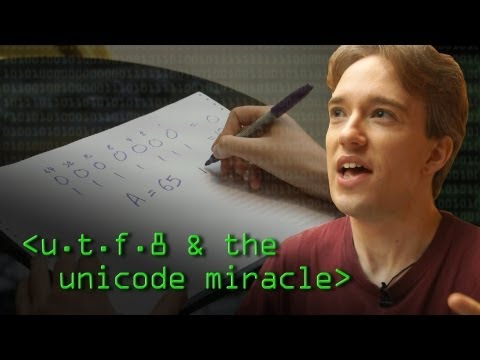

In [186]:
from IPython.display import YouTubeVideo
YouTubeVideo("MijmeoH9LT4", width="60%")

In his [PyCon Australia 2018](https://2018.pycon-au.org/) talk titled "*Unicode and Python: The absolute minimum you need to know*" [Raphaël Merx](https://www.linkedin.com/in/raphaelmerx/) explains some caveats and best practices regarding Unicode.

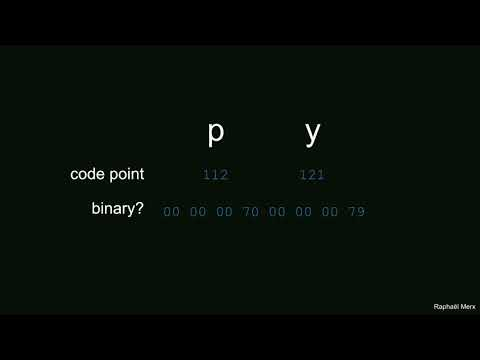

In [187]:
YouTubeVideo("oXVmZGN6plY", width="60%")

In a similar talk at [PyCon 2017](https://us.pycon.org/2017/) titled "*Unicode what is the big deal*" [Łukasz Langa](https://www.linkedin.com/in/llanga/) provides further lessons learned regarding Unicode.

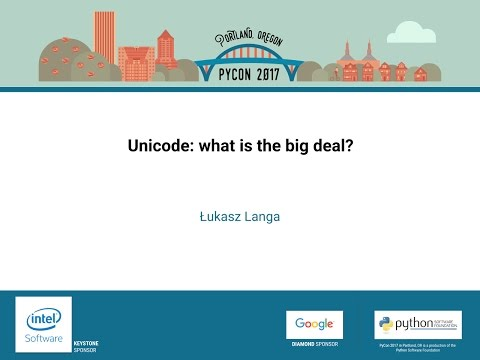

In [188]:
YouTubeVideo("7m5JA3XaZ4k", width="60%")

In a "classic" talk from PyCon 2012 titled "*Pragmatic Unicode, or, How do I stop the pain?*" [Ned Batchelder](https://nedbatchelder.com/) explains among others the concept of a "Unicode Sandwich."

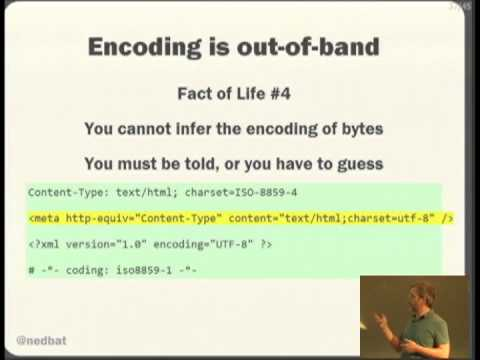

In [189]:
YouTubeVideo("sgHbC6udIqc", width="60%")

Lastly, in his entertaining talk at [PyCon.DE 2019](https://de.pycon.org/) titled "*Your Name is Invalid!*" [Miroslav Šedivý](https://www.linkedin.com/in/%C5%A1ediv%C3%BD/) shows how hard it actually is to write software that can process any name a human can possibly have. Miroslav also gave a lightning talk where he shows how he uses only one keyboard for the 12 (!!!) languages he speaks.

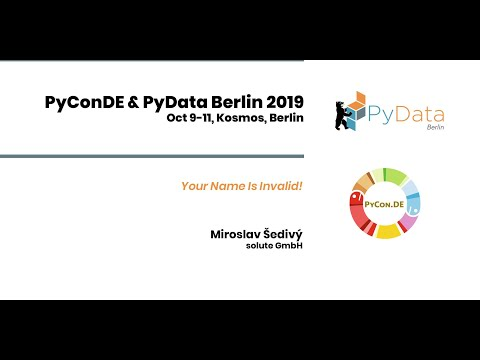

In [190]:
YouTubeVideo("pBuS7EUPnQA", width="60%")

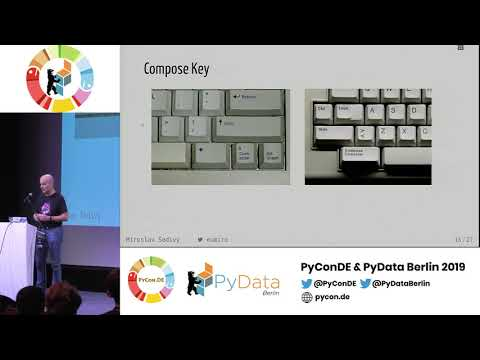

In [191]:
YouTubeVideo("-4QjII981sM", width="60%")